# Pre-processing example (with HYDROLIB-core)
If you prefer to interact with a Python script instead, you can convert this notebook to *.py with `jupyter nbconvert --to script preprocessing_example_hydrolib.ipynb`.


In [1]:
# this notebook does not run in binder, since the data is not yet available online
import os
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
import dfm_tools as dfmt
import hydrolib.core.dflowfm as hcdfm


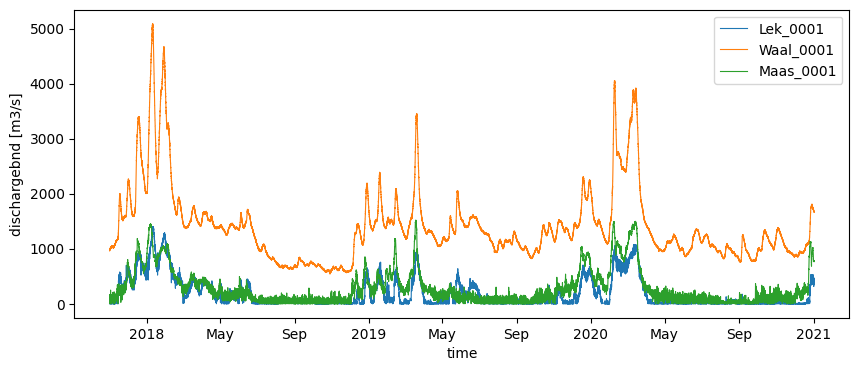

In [2]:
# load .bc-file using HydroLib object ForcingModel.
file_bc = r'p:\archivedprojects\11208053-004-kpp2022-rmm1d2d\C_Work\09_Validatie2018_2020\dflowfm2d-rmm_vzm-j19_6-v2d\boundary_conditions\rmm_rivdis_meas_20171101_20210102_MET.bc'
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, ax = plt.subplots(figsize=(10,4))
# loop over three timeseries in bcfile/ForingModel
for iFO, forcingobj in enumerate(forcingmodel_object.forcing):
    forcing_xr = dfmt.forcinglike_to_Dataset(forcingobj, convertnan=True)
    forcing_xr['dischargebnd'].plot(ax=ax, label=forcing_xr['dischargebnd'].attrs['locationname'], linewidth=0.8)
ax.legend(loc=1)


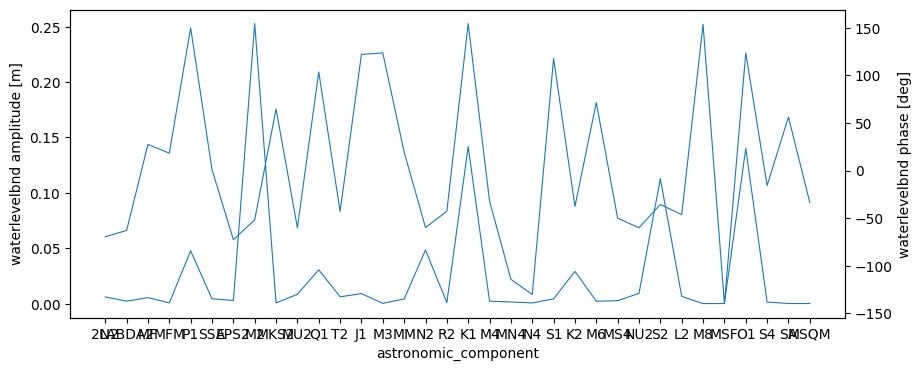

In [3]:
# load .bc-file using HydroLib object ForcingModel.
file_bc = r'p:\archivedprojects\11208154-002-haixia\02-hydrodynamics\02_Model_set_up\02_Make_forcing\FES2014\New_bnd_lines_2022\bc_South_v2.bc'
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twinx()
forcing_xr = dfmt.forcinglike_to_Dataset(forcingmodel_object.forcing[0], convertnan=True)
forcing_xr['waterlevelbnd amplitude'].plot(ax=ax, linewidth=0.8)
forcing_xr['waterlevelbnd phase'].plot(ax=ax2, linewidth=0.8)


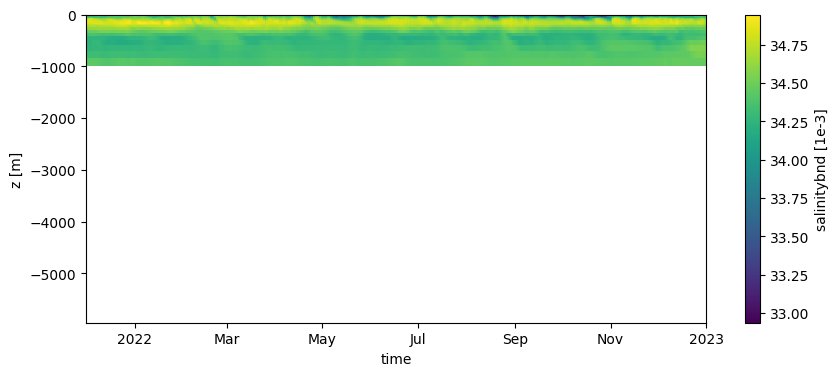

In [4]:
# load .bc-file using HydroLib object ForcingModel.
file_bc = r'p:\archivedprojects\11208154-002-haixia\02-hydrodynamics\02_Model_set_up\02_Make_forcing\CMEMS\bc_2022\South_v2\nonan\salinitybnd_bc_South_v2_CMEMS.bc'
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, ax = plt.subplots(figsize=(10,4))
forcing_xr = dfmt.forcinglike_to_Dataset(forcingmodel_object.forcing[0], convertnan=True)
forcing_xr['salinitybnd'].T.plot(ax=ax)


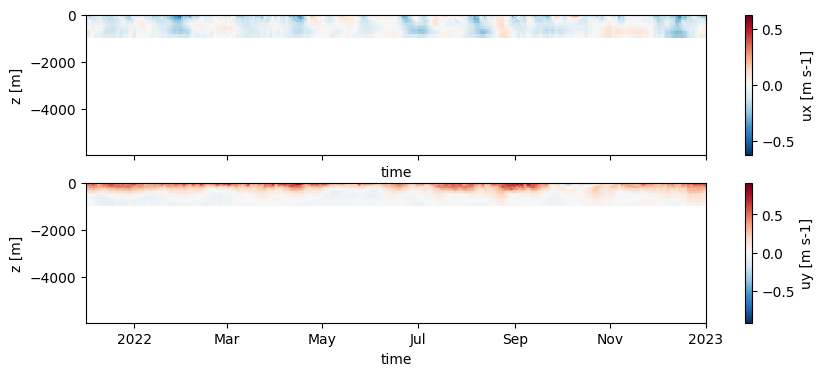

In [5]:
# load .bc-file using HydroLib object ForcingModel.
file_bc = r'p:\archivedprojects\11208154-002-haixia\02-hydrodynamics\02_Model_set_up\02_Make_forcing\CMEMS\bc_2022\South_v2\nonan\uxuy_bc_South_v2_CMEMS.bc'
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,4), sharex=True, sharey=True)
forcing_xr = dfmt.forcinglike_to_Dataset(forcingmodel_object.forcing[0], convertnan=True)
forcing_xr['ux'].T.plot(ax=ax1)
forcing_xr['uy'].T.plot(ax=ax2)


36990.7701 71389.8071 404513.333 426415.3429


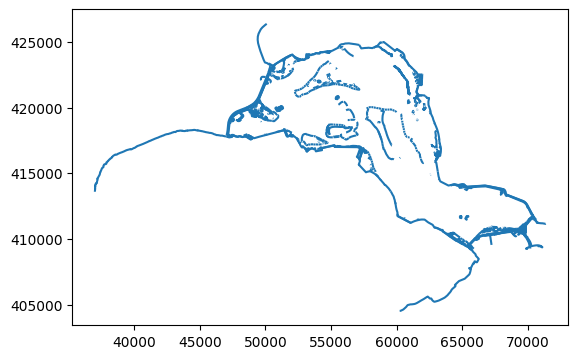

In [9]:
# load pol/pli/ldb file WITH HYDROLIB-core
file_pli = r'p:\archivedprojects\11205259-006-d-hydro-grevelingen\2Dh\model\2002\geometry\structures\Grevelingen-FM_BL_fxw.pliz'
polyfile_object = hcdfm.PolyFile(file_pli)
gdf_polyfile = dfmt.PolyFile_to_geodataframe_linestrings(polyfile_object,crs='EPSG:28992')
ax = gdf_polyfile.plot()
ax.set_aspect('equal')

#get extents of all objects in polyfile
pol_bounds = gdf_polyfile.geometry.bounds
print(pol_bounds['minx'].min(),pol_bounds['maxx'].max(),pol_bounds['miny'].min(),pol_bounds['maxy'].max())


AttributeError: 'DataFrame' object has no attribute 'geometry'

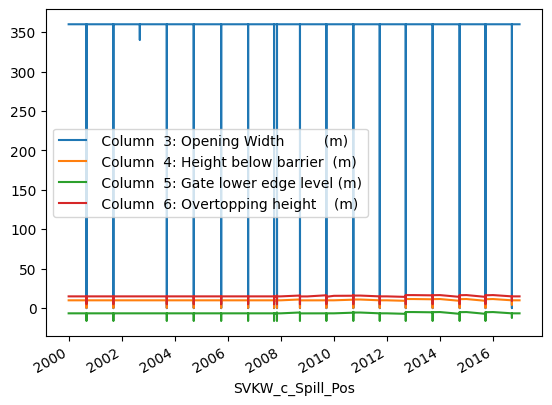

In [8]:
# load tekal file WITH HYDROLIB-core
file_pli = r'p:\archivedprojects\11205258-006-kpp2020_rmm-g6\C_Work\04_randvoorwaarden\keringen\Maeslantkering\Maeslant.tek'
polyfile_object = hcdfm.PolyFile(file_pli)
polyobject_pd = dfmt.tekalobject_to_DataFrame(polyfile_object.objects[0])
ax = polyobject_pd.plot()
